In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk

In [5]:
df = pd.read_csv("twitter_training.csv")

In [6]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [9]:
col_names=['ID','Entity','Sentiment','Contest']
df = pd.read_csv("twitter_training.csv",names=col_names)

In [10]:
df.head()

,ID,Entity,Sentiment,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
df.shape

(74682, 4)

In [14]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac wind

In [15]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Contest      686
dtype: int64

In [17]:
df.dropna(axis=0,inplace=True)

In [18]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Contest      0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(2340)

In [21]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [22]:
df.shape

(71656, 4)

In [24]:
df.columns


Index(['ID', 'Entity', 'Sentiment', 'Contest'], dtype='object')

In [27]:
sentiment_counts=df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

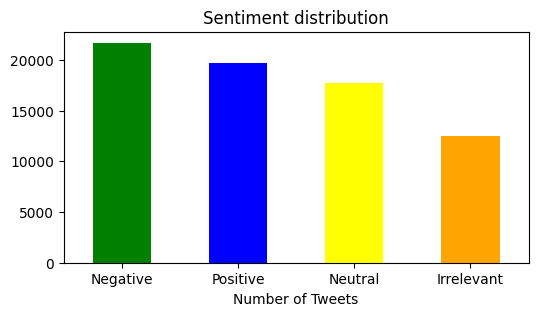

In [31]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['green','blue','yellow','orange'])
plt.title('Sentiment distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71656 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         71656 non-null  int64 
 1   Entity     71656 non-null  object
 2   Sentiment  71656 non-null  object
 3   Contest    71656 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [35]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Sentiment
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

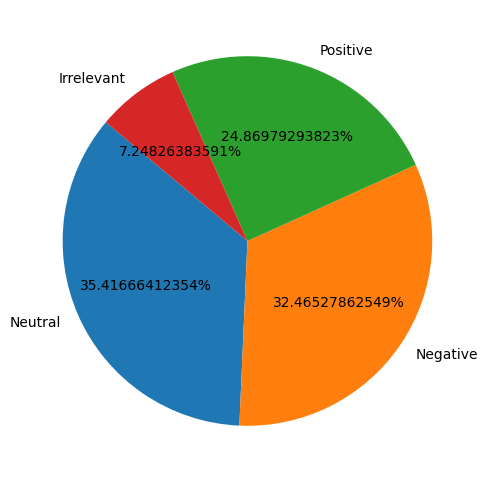

In [38]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.11f%%',startangle=140)
plt.show()